# ATV 06 - Análise de Sentimento - Classificação de comentários no IMDB

In [34]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.data.path.append('/Users/luiscruz/nltk_data')  
nltk.download("punkt")  # pretrained tokenization model
nltk.download('punkt_tab')
print(nltk.data.find('tokenizers/punkt'))

from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

RANDOM_STATE = 42


/Users/luiscruz/nltk_data/tokenizers/punkt


[nltk_data] Downloading package punkt to /Users/luiscruz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/luiscruz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luiscruz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/luiscruz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
imdb = pd.read_csv("./IMDB.csv")

## Pre-processamento

- Tokenização
- Remoção de Stop Words
- Stemming ou Lemmatization

In [3]:
def remove_html_tags_and_punctuation(text):
    clean = re.sub(r'<.*?>', '', text)
    clean = re.sub(r'\.', ' ', clean)
    clean = re.sub(r'[^\w\s]', '', clean)
    clean = re.sub(r'\d', '', clean) 
    return clean

comments = imdb["review"].to_numpy()
targets = imdb["sentiment"].to_numpy()

for i in range(len(comments)):
    comments[i] = remove_html_tags_and_punctuation(comments[i])

print(comments[0])

One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked  They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO  Trust me this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs sex or violence  Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  Em City is home to many  Aryans Muslims gangstas Latinos Christians Italians Irish and more    so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  Forget

In [4]:
for sentence in comments[0:5]:
    print(sentence)

One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked  They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO  Trust me this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs sex or violence  Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  Em City is home to many  Aryans Muslims gangstas Latinos Christians Italians Irish and more    so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  Forget

In [5]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in comments]
tokenized_corpus[0]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',
 'emera

In [6]:
# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))

tokenized_filtered_corpus = []

for comment in tokenized_corpus:
    filtered_words = [word for word in comment if word.lower() not in stop_words]
    tokenized_filtered_corpus.append(filtered_words)

print(tokenized_filtered_corpus[0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences', 'fo

In [7]:
lemmatizer = WordNetLemmatizer()

tokenized_filtered_lemmatized = []

for comment in tokenized_filtered_corpus:
    lemmatized_words = [lemmatizer.lemmatize(word) for word in comment]
    tokenized_filtered_lemmatized.append(lemmatized_words)

print(tokenized_filtered_lemmatized[0])

['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 

## Vetorização

- BoW
- TF-IDF
- Word2Vec

In [8]:
[" ".join(sentence) for sentence in tokenized_filtered_lemmatized]

['one reviewer mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romance oz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lack st

In [9]:
MAX_FEATURES = 5000
MIN_DF = 2
MAX_DF = 0.2

In [10]:
def bow_vectorization(corpus):
    vectorizer = CountVectorizer(max_features=MAX_FEATURES, min_df=MIN_DF, max_df=MAX_DF)

    X = vectorizer.fit_transform([" ".join(sentence) for sentence in corpus])

    bow_array = X.toarray()
    print("BoW Vectors:\n", bow_array)

    print("Feature Names:\n", vectorizer.get_feature_names_out())

    return bow_array

In [11]:
def tf_idf_vectorization(corpus):
    tfidf_vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, min_df=MIN_DF, max_df=MAX_DF)

    X_tfidf = tfidf_vectorizer.fit_transform([" ".join(sentence) for sentence in corpus])

    tfidf_array = X_tfidf.toarray()
    print("TF-IDF Vectors:\n", tfidf_array)

    print("Feature Names:\n", tfidf_vectorizer.get_feature_names_out())

    return tfidf_array

In [12]:
def word2vec_vectorization(corpus):
    model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

    # Access the vector for a specific word
    word_vector = model.wv['document']
    print("Word Vector for 'document':\n", word_vector)

    # To get vectors for the entire corpus, you can average the vectors of all words in each document
    doc_vectors = []
    for doc in tokenized_corpus:
        # Average the word vectors for each document
        vector = np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)
        doc_vectors.append(vector)

    print("Document Vectors (Averaged):\n", np.array(doc_vectors))

    return doc_vectors

In [13]:
bow_res = bow_vectorization(tokenized_filtered_lemmatized)

BoW Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names:
 ['aaron' 'abandoned' 'abc' ... 'zero' 'zombie' 'zone']


In [14]:
tf_idf_res = tf_idf_vectorization(tokenized_filtered_lemmatized)

TF-IDF Vectors:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['aaron' 'abandoned' 'abc' ... 'zero' 'zombie' 'zone']


In [15]:
w2v_res = word2vec_vectorization(tokenized_filtered_lemmatized)

Word Vector for 'document':
 [-0.0320978   0.2376933  -0.1324081   0.16815476 -0.4074847  -0.60136384
  0.03202769  0.11984842 -0.71320665  0.5285386  -0.3243309  -0.6715985
 -0.44128284 -0.1337873  -0.29144052 -0.1568041  -0.29657876 -0.36475846
 -0.8671195  -0.9028958   0.15182367  0.64181113  0.11719895 -0.566621
  0.10181593  0.14356896  0.132587   -0.3523982  -0.75133073  0.6039783
  0.83778006  0.9077636  -0.0120031   0.10138166 -0.29169318  0.02079228
 -0.8285495  -0.7424064  -0.59961766  0.31313962  0.32654774 -0.3731671
  0.91603893 -0.15511037  0.31745878 -0.2786061   0.03218483 -0.3736785
 -0.64351743  0.16669318  0.0890438  -0.31456593  0.02679956 -0.51963925
  0.4601349  -0.01862044  0.01887568  0.91546106 -0.4990378   0.38115442
  0.6608556   0.54294866  0.13799042 -0.06369933 -0.2127657   0.12455139
 -0.08732236 -0.15253569 -0.15548177  0.6741022  -0.65617096  0.25833505
  0.3192741  -0.13999337  0.3301488   0.04056647  0.27434275 -0.3742239
  0.31480974  0.56522375 -0.1

## Experimentos

In [31]:
def train_test_classifier(data, targets, classifier, title="Model"):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=RANDOM_STATE)

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print(title)
    print(classification_report(y_test, y_pred))

    return accuracy_score(y_test, y_pred)

In [18]:
bow_res[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
targets[0:5]

array(['positive', 'positive', 'positive', 'negative', 'positive'],
      dtype=object)

In [20]:
del imdb
del comments
del tokenized_corpus
del tokenized_filtered_corpus
del tokenized_filtered_lemmatized

In [21]:
targets_num = np.where(targets == 'negative', 0, np.where(targets == 'positive', 1, targets)).astype(np.int32)

targets_num[0:5]

array([1, 1, 1, 0, 1], dtype=int32)

In [22]:
pd.Series(targets_num).info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: None
Non-Null Count  Dtype
--------------  -----
50000 non-null  int32
dtypes: int32(1)
memory usage: 195.4 KB


In [32]:
rf_accs = []
xgb_accs = []

for i, data in enumerate([bow_res, tf_idf_res, w2v_res]):
    rf = RandomForestClassifier()
    xgb = XGBClassifier()

    rf_accs.append(train_test_classifier(data, targets, rf, f"Random Forest {i}"))
    xgb_accs.append(train_test_classifier(data, targets_num, xgb, f"XGBoost {i}"))

Random Forest 0
              precision    recall  f1-score   support

    negative       0.83      0.86      0.85      7411
    positive       0.86      0.83      0.84      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

XGBoost 0
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7411
           1       0.84      0.88      0.86      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

Random Forest 1
              precision    recall  f1-score   support

    negative       0.83      0.86      0.85      7411
    positive       0.86      0.82      0.84      7589

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.8

In [36]:
labels = ["BoW", "TF-IDF", "Word2Vec"]

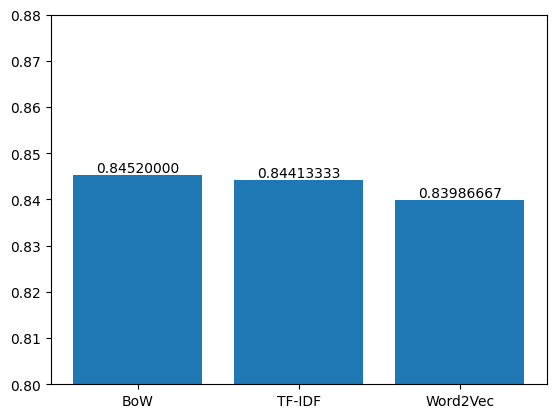

In [42]:
plt.plot()
bars = plt.bar(labels, rf_accs)
plt.ylim(0.8, 0.88)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("Random Forest Accuracies for Each Vectorization")

Text(0.5, 1.0, 'XGBoost Accuracies for Each Vectorization')

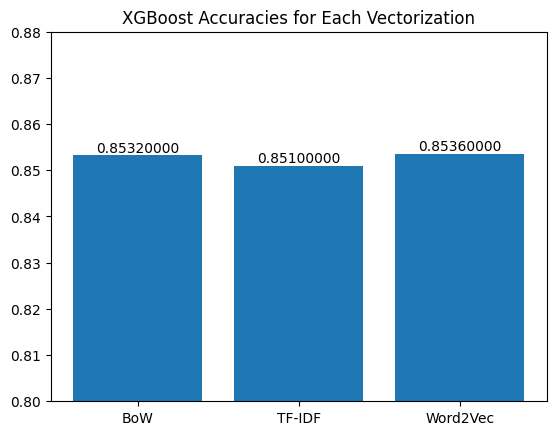

In [43]:
plt.plot()
bars = plt.bar(labels, xgb_accs)
plt.ylim(0.8, 0.88)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("XGBoost Accuracies for Each Vectorization")

A metodologia Word2Vec empregada aqui faz o encoding do documento inteiro, enquanto os outros métodos vetorizam palavra a palavra. Poderia se imaginar que a Word2Vec ia causar perda de informação e portanto uma performance pior mas na verdade depende. No Random Forest isso foi sim verdade mas no XGBoost a vetorização W2V teve a melhor performance. Para o BoW e o TF-IDF, o BoW supera o outro nos dois casos, mesmo truncando as entradas para diminuir a esparsidade dos vetores.